<a href="https://colab.research.google.com/github/ahrarbinaslam/pytorch-tutorial/blob/main/Neural_Network_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

Classification is the task of predicting which of a set of classes an example belongs to. Suppose you have pictures of a dog, cat, and a horse. You train the model and show it the picture of a dog, the model should classify it as a dog (i.e. one of the classes).

There are two types of classification:

1.   Binary Classification
2.   Multiclass Classification

**Binary Classification:**: Classifying objects into one of two classes is called binary classification.

**Multiclass Classification:** Classifying objects into one of three or more classes is called multiclass classification.

## Importing the necessary libraries

In [ ]:
import sklearn
from sklearn.datasets import make_circles
import torch
import pandas as pd
from matplotlib import pyplot as plt

## Using the make_circles dataset

In [ ]:
n_samples=1000
X , y=make_circles(n_samples, noise=0.03, random_state=42) #Random_state is similar to torch.manual_seed()

print(f"Printing the first five samples of X: {X[:5]}")
print(f"Printing the first five samples of y: {y[:5]}")

Printing the first five samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Printing the first five samples of y: [1 1 1 1 0]


## Converting our features and labels into a Pandas DataFrame

In [ ]:
new_dataframe=pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "Y":y})
new_dataframe

,X1,X2,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


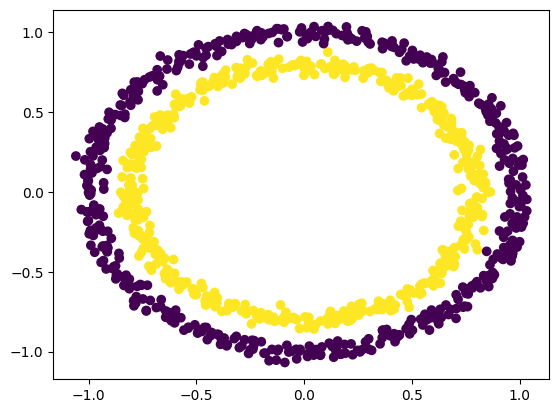

In [ ]:
# To visualize the data, we are using matplotlib

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.viridis)
plt.show()

In [ ]:
# Converting the data into tensors

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

print(f"Printing the first five samples of X Tensor: {X[:5]}")
print(f"Printing the first five samples of y tensor: {y[:5]}")

Printing the first five samples of X Tensor: tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])
Printing the first five samples of y tensor: tensor([1., 1., 1., 1., 0.])


In [ ]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

(800, 200)

In [ ]:
len(y_train), len(y_test)

(800, 200)

In [ ]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Creating a classification class to create layers of our neural network

In [ ]:
class CircleClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=5)
    self.layer2=nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer2(self.layer1(x))

model=CircleClassification().to(device)
model

CircleClassification(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# There is also an easier method to implement the same Neural Network

model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6651,  0.4240],
                      [-0.0688, -0.2231],
                      [ 0.0854, -0.0239],
                      [-0.1335,  0.5719],
                      [ 0.4346,  0.2280]])),
             ('0.bias', tensor([-0.4986,  0.6000,  0.3826,  0.6847,  0.4295])),
             ('1.weight',
              tensor([[ 0.3749,  0.1633, -0.2942,  0.0331,  0.0437]])),
             ('1.bias', tensor([0.2217]))])

##### You can play with neural networks with different layers, inputs, activation functions, learning rates, etc on : https://playground.tensorflow.org/

In [ ]:
with torch.inference_mode():
  y_predicted = model_0(X_test.to(device))

print(f"The length of the predictions are: {len(y_predicted)} and Shape: {y_predicted.shape}")
print(f"The length of the actual labels are: {len(y_test)} and Shape: {y_test.shape}")
print(f"The first 10 predictions are: {y_predicted[:10]}")
print(f"The first 10 labels are: {y_test[:10]}")

The length of the predictions are: 200 and Shape: torch.Size([200, 1])
The length of the actual labels are: 200 and Shape: torch.Size([200])
The first 10 predictions are: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
The first 10 labels are: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# Creating a loss function
loss_fn= nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer= torch.optim.SGD(model_0.parameters(), lr=0.01)

In [54]:
def accuracy(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc= correct/(len(y_pred)) * 100
  return acc

## Training and Testing Loop

1. Do the Forward Pass
2. Calculate the Training Loss
3. Zero the Grad
4. Loss Backward (Backpropagation)
5. Optimizer Step (Gradient Descent)
6. Make Predictions
7. Calculate the Testing Loss
8. Calculate the Accuracy

In [ ]:
# Before creating a training loop, lets see what our y_predicted looks like right now
print(f"The first five values of y_predicted are: {y_predicted[:5]}")

The first five values of y_predicted are: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])


In [ ]:
# We can see that these are random values, where as we need our model to classify the objects, like 0 or 1.
# So we need to pass the y_predicted to an activation function, for simplicity, lets just use Sigmoid for now.
y_prob = torch.sigmoid(y_predicted)
print(f"The probabilities of the labels are : {y_prob[:5]}")

The probabilities of the labels are : tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])


In [ ]:
# Lets us pass it through the round function to round them to either 0 or 1.

y_prob_round = torch.round(y_prob)
y_prob_round[:5]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [ ]:
torch.manual_seed(42)
epochs = 500

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_preds = model_0(X_train).squeeze()
  y_preds_value = torch.round(torch.sigmoid(y_preds))

  training_loss=loss_fn(y_preds, y_train)
  training_acc = accuracy(y_true=y_train, y_pred=y_preds_value)

  optimizer.zero_grad()

  training_loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test).squeeze()
    test_pred_value = torch.round(torch.sigmoid(test_pred))

    test_loss = loss_fn(test_pred, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred_value)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {training_loss:.5f}, Accuracy: {training_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69796, Accuracy: 51.88% | Test loss: 0.69460, Test acc: 57.50%
Epoch: 10 | Loss: 0.69768, Accuracy: 52.00% | Test loss: 0.69438, Test acc: 58.00%
Epoch: 20 | Loss: 0.69742, Accuracy: 52.00% | Test loss: 0.69418, Test acc: 57.50%
Epoch: 30 | Loss: 0.69717, Accuracy: 52.00% | Test loss: 0.69401, Test acc: 56.50%
Epoch: 40 | Loss: 0.69695, Accuracy: 51.62% | Test loss: 0.69385, Test acc: 56.50%
Epoch: 50 | Loss: 0.69675, Accuracy: 51.38% | Test loss: 0.69370, Test acc: 56.00%
Epoch: 60 | Loss: 0.69656, Accuracy: 51.38% | Test loss: 0.69357, Test acc: 56.00%
Epoch: 70 | Loss: 0.69638, Accuracy: 51.38% | Test loss: 0.69345, Test acc: 56.50%
Epoch: 80 | Loss: 0.69621, Accuracy: 51.25% | Test loss: 0.69334, Test acc: 56.50%
Epoch: 90 | Loss: 0.69606, Accuracy: 51.38% | Test loss: 0.69324, Test acc: 55.00%
Epoch: 100 | Loss: 0.69592, Accuracy: 51.12% | Test loss: 0.69315, Test acc: 54.00%
Epoch: 110 | Loss: 0.69579, Accuracy: 51.00% | Test loss: 0.69306, Test acc: 53.00%
Epo

## Our model is perfoming very badly, so we need to inspect what is going wrong.

In [62]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

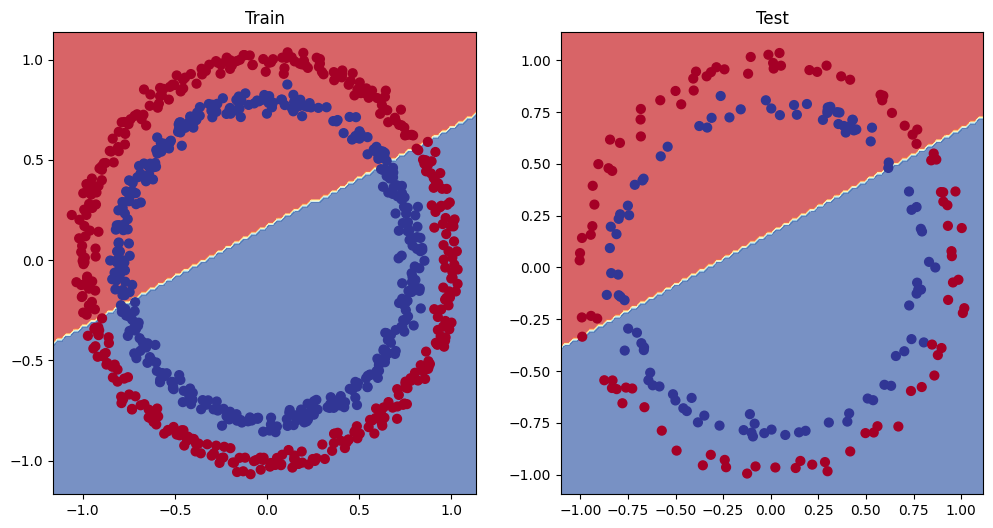

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## To improve a model, there are various things one can do:


1.   Add more layers
2.   Add more hidden units
3.   Fitting for longer (more epochs)
4.   Changing the activation functions
5.   Change the learning rate
6.   Change the loss function


In [ ]:
# So, here is the update that we have made:

# 1. Increased number of layers: Three fully connected layers (Linear layers).
# 2. Increased number of output features in the hidden layers: Both hidden layers have 10 neurons.
# 3. Introduced ReLU (Rectified Linear Unit) activation function to introduce non-linearity, improving the model's ability to learn complex patterns.

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):

       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = CircleModelV2().to(device)
print(model_1)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 2000

epoch_count=[]
training_loss_values=[]
testing_loss_values=[]

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_preds = model_1(X_train).squeeze()
  y_preds_value = torch.round(torch.sigmoid(y_preds))

  training_loss=loss_fn(y_preds, y_train)
  training_acc = accuracy(y_true=y_train, y_pred=y_preds_value)

  optimizer.zero_grad()

  training_loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test).squeeze()
    test_pred_value = torch.round(torch.sigmoid(test_pred))

    test_loss = loss_fn(test_pred, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred_value)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {training_loss:.5f}, Accuracy: {training_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    training_loss_values.append(training_loss.detach().numpy())
    testing_loss_values.append(test_loss.detach().numpy())
    epoch_count.append(epoch)

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 10 | Loss: 0.69248, Accuracy: 50.50% | Test loss: 0.69260, Test acc: 50.00%
Epoch: 20 | Loss: 0.69225, Accuracy: 59.13% | Test loss: 0.69231, Test acc: 56.50%
Epoch: 30 | Loss: 0.69209, Accuracy: 70.25% | Test loss: 0.69212, Test acc: 68.00%
Epoch: 40 | Loss: 0.69195, Accuracy: 68.38% | Test loss: 0.69195, Test acc: 71.00%
Epoch: 50 | Loss: 0.69181, Accuracy: 58.25% | Test loss: 0.69177, Test acc: 58.00%
Epoch: 60 | Loss: 0.69168, Accuracy: 54.00% | Test loss: 0.69161, Test acc: 54.50%
Epoch: 70 | Loss: 0.69155, Accuracy: 53.12% | Test loss: 0.69146, Test acc: 53.00%
Epoch: 80 | Loss: 0.69141, Accuracy: 52.62% | Test loss: 0.69132, Test acc: 53.00%
Epoch: 90 | Loss: 0.69128, Accuracy: 52.75% | Test loss: 0.69117, Test acc: 53.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 110 | Loss: 0.69103, Accuracy: 52.88% | Test loss: 0.69088, Test acc: 53.50%
Epo

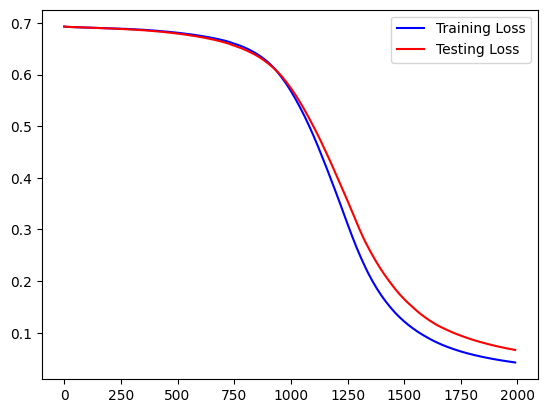

In [ ]:
plt.plot(epoch_count, training_loss_values, c="b", label="Training Loss")
plt.plot(epoch_count, testing_loss_values, c="r", label="Testing Loss")
plt.legend(loc="best")
plt.show()

In [ ]:
# Predicting labels with our model

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()

print(y_preds[:10])
print(y_test[:10])

print(f"Comparing our first 10 labels: {torch.eq(y_preds[:10], y_test[:10])}")



tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
Comparing our first 10 labels: tensor([True, True, True, True, True, True, True, True, True, True])


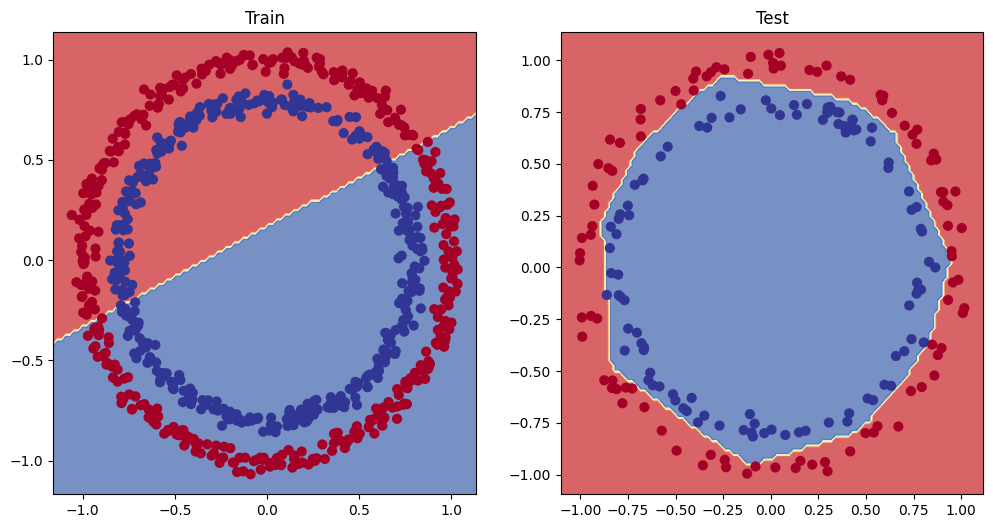

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_0 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) # model_3 = has non-linearity

## What do Sigmoid and ReLU activation functions actually do?

1. Sigmoid `(1/1+e^-x)`
2. RELU     `max(0,x)`

In [ ]:
# We can implement Sigmoid and RELU activation functions by ourself as well
import math
def Sigmoid(x: torch.tensor):
  return 1/(1+torch.exp(-x))


In [ ]:
# Torch.rand Returns a tensor filled with random numbers from a uniform distribution on the interval [0,1)
# Torch.randn Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution).
tensor1=torch.randn(10)
tensor1

tensor([ 0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380,  0.4617,  0.2674,
         0.5349,  0.8094])

In [ ]:
Sigmoid(tensor1)
print(f"The output of the sigmoid activation function on our tensor is: {Sigmoid(tensor1)}")
print(f"We are rounding off the value to make it between 0 and 1: {torch.round(Sigmoid(tensor1))}")

The output of the sigmoid activation function on our tensor is: tensor([0.5583, 0.5573, 0.2455, 0.4536, 0.9010, 0.3457, 0.6134, 0.5664, 0.6306,
        0.6920])
We are rounding off the value to make it between 0 and 1: tensor([1., 1., 0., 0., 1., 0., 1., 1., 1., 1.])


In [ ]:
# RELU activation function

def RELU(x: torch.tensor):
  return torch.maximum(torch.tensor(0), x)

RELU(tensor1)

tensor([0.2345, 0.2303, 0.0000, 0.0000, 2.2082, 0.0000, 0.4617, 0.2674, 0.5349,
        0.8094])

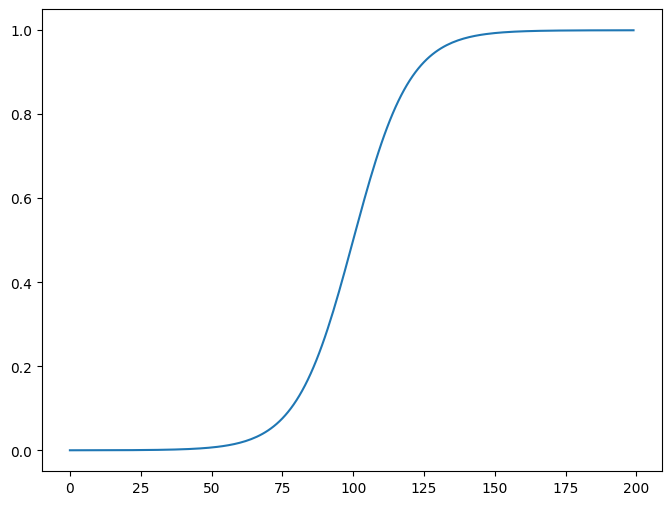

In [ ]:
tensor2=torch.arange(-10,10,0.1)
plt.figure(figsize=(8,6))
plt.plot(Sigmoid(tensor2))
plt.show()

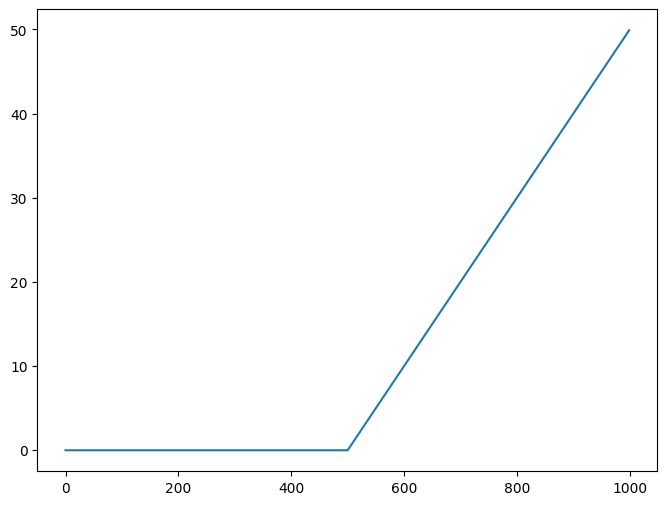

In [ ]:
tensor2=torch.arange(-50,50,0.1)
plt.figure(figsize=(8,6))
plt.plot(RELU(tensor2))
plt.show()

# **Multiclass Classification**

In [3]:
import torch
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [15]:
# Hyperparameters for dataset creation

num_of_classes=4
num_of_features=2
random_seed=42

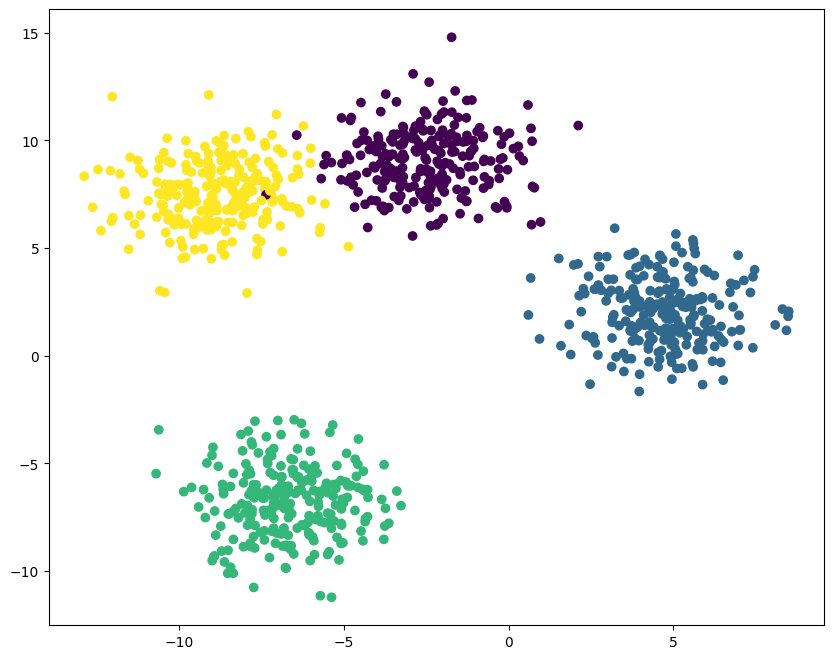

In [42]:
# 1. Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=num_of_features,centers=num_of_classes, cluster_std=1.5, random_state=random_seed)

# 2. Convert data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split the data into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(X_blob, y_blob, test_size=0.2, random_state=random_seed)

# 4. Plot the data
plt.figure(figsize=(10,8))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap="viridis")
plt.show()

# **Building a multi-class classification model**

In [43]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [44]:
from torch import nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8): #The number of hidden neurons we'd like each hidden layer to use.
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

model = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [45]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [46]:
# Creating a loss function and an optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Making predictions

To evaluate our model, we need to convert our model's output (logits) into prediction probabilities and then to prediction labels.

In [47]:
model.eval()
with torch.inference_mode():
  y_logits=model(X_blob_test).to(device)
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [48]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [49]:
# Converting our model's output (logits) into prediction probabilities
y_pred_probs=torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [50]:
# Converting our model's predicition probabilities into prediction labels
y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [51]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

# Checking if our model is prediciting correctly or falsely.

In [52]:
true_count=0
false_count=0
for x in range(len(y_blob_test)):
  if y_preds[x]==y_blob_test[x]:
    print("True")
    true_count=true_count+1
  else:
    print("False")
    false_count=false_count+1

print(true_count)
print(false_count)

False
True
True
True
False
True
True
False
True
False
False
False
False
False
False
True
True
True
True
True
True
False
False
True
True
True
True
False
False
False
True
True
True
False
True
True
True
True
False
True
False
True
True
True
False
True
False
False
False
True
True
False
False
True
True
True
False
True
True
True
True
False
True
True
True
False
False
True
True
False
False
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
False
False
True
False
True
True
True
False
True
True
True
True
False
True
True
True
False
False
True
True
True
True
False
True
True
False
False
False
True
True
False
True
True
True
False
True
False
False
False
True
True
False
True
True
True
True
False
True
True
True
True
True
True
True
False
False
True
True
True
False
True
False
True
True
False
True
True
False
True
True
True
False
True
True
True
True
True
True
True
True
False
True
True
False
True
True
False
False


# **Creating a training and testing loop for a multi-class PyTorch model**

In [55]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


In [56]:
model.eval()
with torch.inference_mode():
  y_logits=model(X_blob_test).to(device)
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [57]:
# Converting our model's output (logits) into prediction probabilities
y_pred_probs=torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186]])
tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06]])


In [58]:
# Converting our model's predicition probabilities into prediction labels
y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [60]:
print(f"Predictions: {y_preds[:10]}")
print(f"Labels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


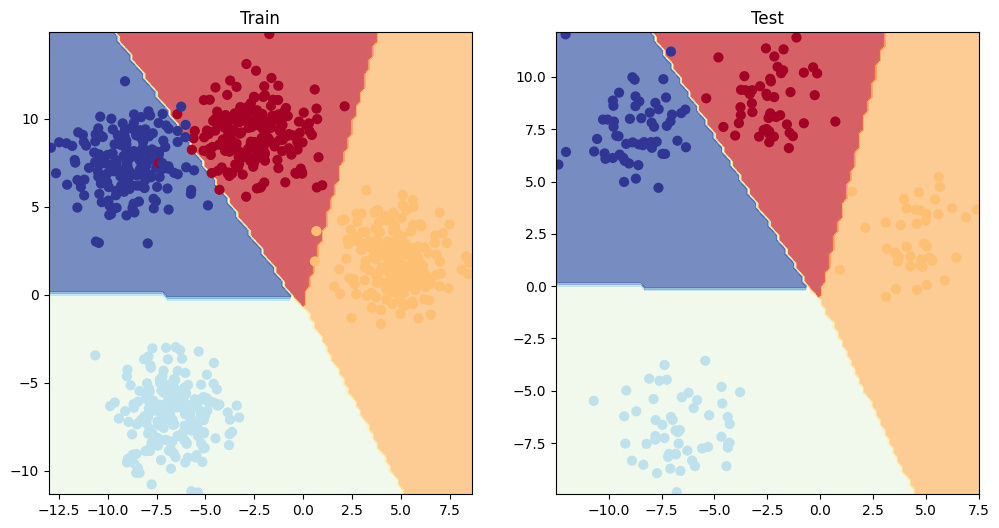

In [63]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)